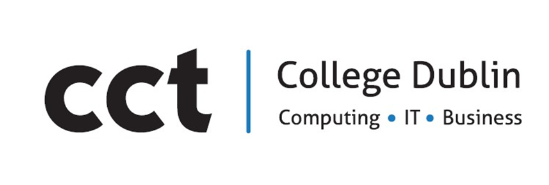

## Keith Cavalcante Fernandes 2020353
Module Title(s): Machine Learning for AI <br>
Assignment Type: Individual           Weighting(s): 50% <br>
Assignment Title: ML_CA2              Lecturer(s): David McQuaid


Github Link: https://github.com/353-KeithFernandes/KeithFernandes_ML_CA2.git 

# Neural Network Model in Bank Records

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kcfke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
#loading dataset
df2 = pd.read_csv('BankRecords.csv')

In [36]:
df2.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


**Data Preparation**

In [37]:
#Checking if there is any missing values
has_missing_values = df2.isnull().values.any()
print(f"Are there any missing values? {has_missing_values}")

Are there any missing values? False


*Checking information to show column names, datatype, and show if there are Non-null and the memory usage of the Dataframe*

In [41]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

*Showing the descriptive Statistics*

In [42]:
print(df2.describe())

                ID          Age  Experience(Years)  Income(Thousands's)  \
count  5000.000000  5000.000000        5000.000000          5000.000000   
mean   2500.500000    45.338400          20.104600            73.774200   
std    1443.520003    11.463166          11.467954            46.033729   
min       1.000000    23.000000          -3.000000             8.000000   
25%    1250.750000    35.000000          10.000000            39.000000   
50%    2500.500000    45.000000          20.000000            64.000000   
75%    3750.250000    55.000000          30.000000            98.000000   
max    5000.000000    67.000000          43.000000           224.000000   

          Sort Code       Family  Credit Score  Mortgage(Thousands's)  
count   5000.000000  5000.000000   5000.000000            5000.000000  
mean   93152.503000     2.396400      1.937913              56.498800  
std     2121.852197     1.147663      1.747666             101.713802  
min     9307.000000     1.000000    

*Dropping Columns*

In [47]:
df2 = df2.drop(['Sort Code', 'Family', 'ID'], axis=1)
df2.dropna(inplace=True)

In [48]:
df2.head()

,Age,Experience(Years),Income(Thousands's),Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,25,1,49,1.6,Diploma,0,No,Yes,No,No,No
1,45,19,34,1.5,Diploma,0,No,Yes,No,No,No
2,39,15,11,1.0,Diploma,0,No,No,No,No,No
3,35,9,100,2.7,Degree,0,No,No,No,No,No
4,35,8,45,1.0,Degree,0,No,No,No,No,Yes


**Using Box plot to Compare Experience and Age**

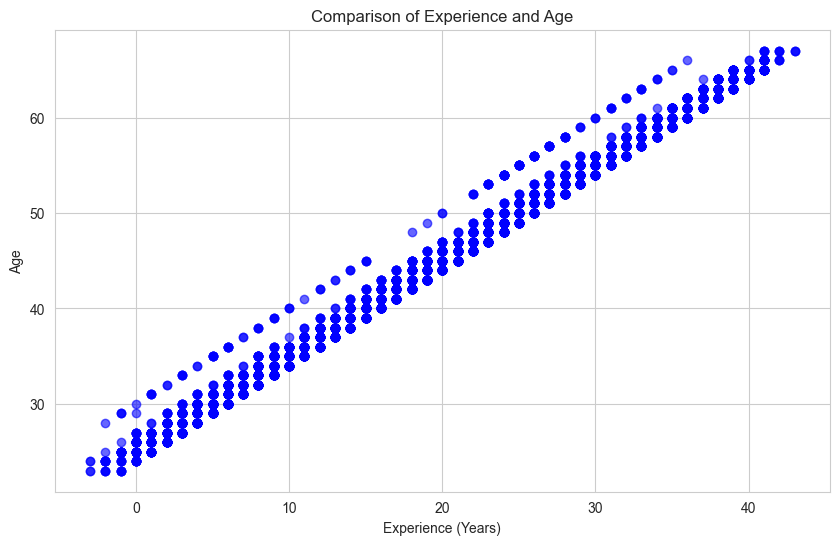

In [50]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['Experience(Years)'], df2['Age'], color='blue', alpha=0.6)
plt.title('Comparison of Experience and Age')
plt.xlabel('Experience (Years)')
plt.ylabel('Age')
plt.grid(True)
plt.show()

As it is possible to check in describe and in this plot graph, there are some experience years that are negative and it has to be treated. And also how strong is this positive linear relationship between Age and Experience.

In [52]:
# Replacing negative values with 0
df2['Experience(Years)'] = df2['Experience(Years)'].apply(lambda x: max(x, 0))

# Printing the cleaned DataFrame
print(df2)
print(df2.describe())

      Age  Experience(Years)  Income(Thousands's)  Credit Score Education  \
0      25                  1                   49           1.6   Diploma   
1      45                 19                   34           1.5   Diploma   
2      39                 15                   11           1.0   Diploma   
3      35                  9                  100           2.7    Degree   
4      35                  8                   45           1.0    Degree   
...   ...                ...                  ...           ...       ...   
4995   29                  3                   40           1.9   Masters   
4996   30                  4                   15           0.4   Diploma   
4997   63                 39                   24           0.3   Masters   
4998   65                 40                   49           0.5    Degree   
4999   28                  4                   83           0.8   Diploma   

      Mortgage(Thousands's) Personal Loan Securities Account CD Account  \


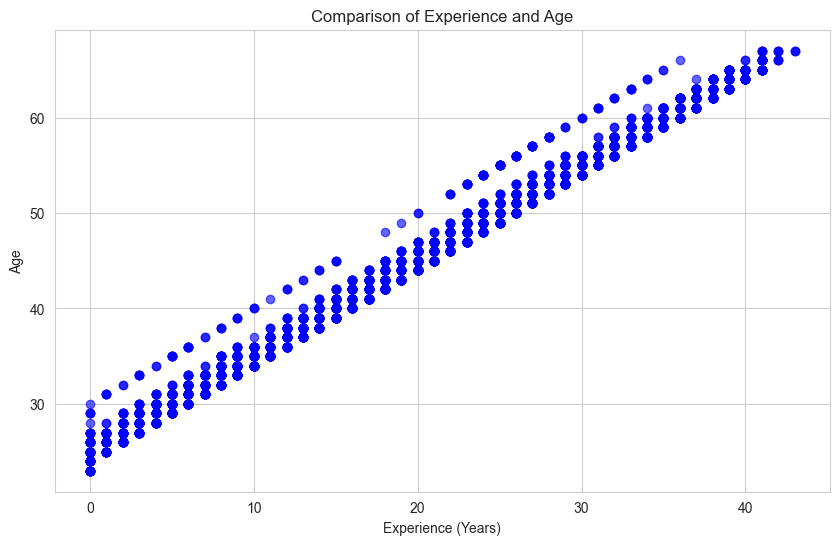

In [54]:
# Plot the scatter plot after cleaning negative numbers for experience
plt.figure(figsize=(10, 6))
plt.scatter(df2['Experience(Years)'], df2['Age'], color='blue', alpha=0.6)
plt.title('Comparison of Experience and Age')
plt.xlabel('Experience (Years)')
plt.ylabel('Age')
plt.grid(True)
plt.show()

**Transforming Categorical Values**

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Split the dataset into input features (X) and the target variable (Y)
X = df2.drop(columns=['Income(Thousands\'s)'])
Y = df2['Income(Thousands\'s)']

# Identifying categorical columns
categorical_columns = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']

# Converting categorical columns to numerical values using Label Encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

print("Input Features (X):\n", X)
print("\nTarget Variable (Y):\n", Y)

Input Features (X):
       Age  Experience(Years)  Credit Score  Education  Mortgage(Thousands's)  \
0      25                  1           1.6          1                      0   
1      45                 19           1.5          1                      0   
2      39                 15           1.0          1                      0   
3      35                  9           2.7          0                      0   
4      35                  8           1.0          0                      0   
...   ...                ...           ...        ...                    ...   
4995   29                  3           1.9          2                      0   
4996   30                  4           0.4          1                     85   
4997   63                 39           0.3          2                      0   
4998   65                 40           0.5          0                      0   
4999   28                  4           0.8          1                      0   

      Personal Loa

**The `StandardScaler` standardises features by removing the mean and scaling to unit variance.**

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the shape of the scaled feature matrix
print("Shape of scaled feature matrix (X_scaled):", X_scaled.shape)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

Shape of scaled feature matrix (X_scaled): (5000, 10)


## Defining Neural Network Model

We are going to build the model which will follow two steps consisting in Setting up an Architecture and after filling in the best numbers.
**Using:**
Hidden layer 1: 64 neurons, ReLU activation
Hidden layer 2: 32 neurons, ReLU activation
Output Layer: 1 neur, linear activationon

In [61]:
# Neural Network Model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Training the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

# Predicting on the test set
Y_pred_nn = model.predict(X_test)

# Evaluating the neural network model
mse_nn = mean_squared_error(Y_test, Y_pred_nn)
r2_nn = r2_score(Y_test, Y_pred_nn)

# Printing the neural neteork model
print(f'Neural Network MSE: {mse_nn}')
print(f'Neural Network R^2 Score: {r2_nn}')

C:\Users\kcfke\anaconda3\envs\tensorflow\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Neural Network MSE: 804.8456771440451
Neural Network R^2 Score: 0.6204490661621094


## Training a linear regression model

In [62]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [67]:
# Predicting on the test set
Y_pred_lr = regressor.predict(X_test)

# Evaluating the linear regression model
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)

print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R^2 Score: {r2_lr}')

Linear Regression MSE: 969.1809649534051
Linear Regression R^2 Score: 0.5429514729214693


### Results

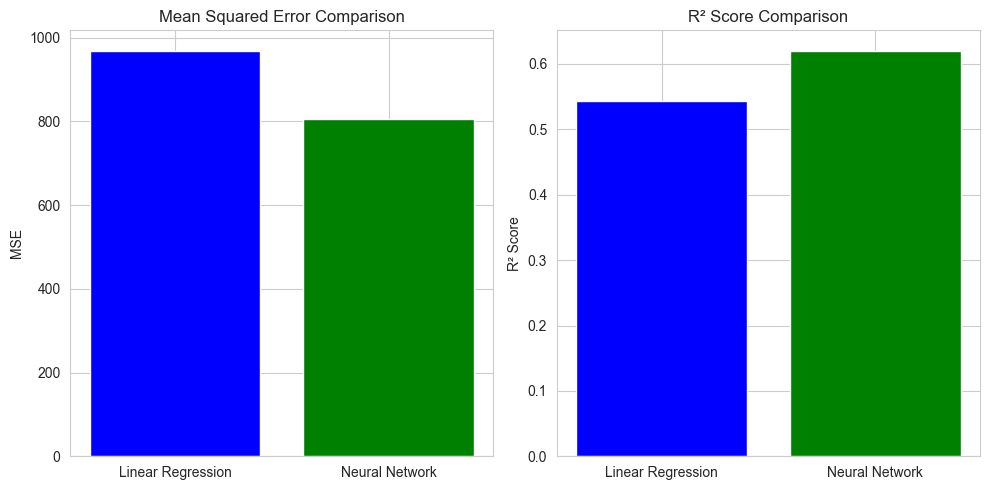

In [68]:
# Plotting MSE
models = ['Linear Regression', 'Neural Network']
mse_values = [mse_lr, mse_nn]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE')

# Plotting R² Score
r2_values = [r2_lr, r2_nn]

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

In this case the MSE of my Neural Network is significantly lower than that my linear regression, which suggests that my Neural Network is capturing more complex patterns. And also in the R² score of my Neural Network is higher than that of my linear regression, which indicates better explanatory power.

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## New customer not available in the original dataset

In [70]:
# Sample new customer data
new_customer_data = {
    'Age': 30,
    'Experience(Years)': 5,
    'Credit Score': 2.0,
    'Education': 'Degree',
    'Mortgage(Thousands\'s)': 20,
    'Personal Loan': 'No',
    'Securities Account': 'Yes',
    'CD Account': 'No',
    'Online Banking': 'Yes',
    'CreditCard': 'No'
}

# Converting dictionary to DataFrame
new_customer_df = pd.DataFrame([new_customer_data])

# Defining the categorical columns
categorical_columns = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
numeric_columns = ['Age', 'Experience(Years)', 'Credit Score', 'Mortgage(Thousands\'s)']

# Preprocessing the new customer's data using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Creating a pipeline with the preprocessor and a model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Spliting the dataset into input features (X) and the target variable (Y)
X = df2.drop(columns=['Income(Thousands\'s)'])
Y = df2['Income(Thousands\'s)']

# Fitting the model
model.fit(X, Y)

# Making predictions for the new customer
new_customer_income_prediction = model.predict(new_customer_df)

print("Predicted Income for the New Customer:", new_customer_income_prediction[0])

Predicted Income for the New Customer: 60.07387775280812


# Sentiment Analysis on Coffee Maker Classification

*Importing All Required Packages*

**Reading Data**

https://www.kaggle.com/datasets/niramay/-coffeemakerclassification

*Loading & Printing Head Dataset* 

In [2]:
df = pd.read_csv('coffee_maker.csv')
df.head()

,review_date,handle,rating,helpfulness_rating,review
0,"April 14, 2018",The Dolphin,2.0,513,Delightful coffee maker if you’re only looking...
1,"February 7, 2019",Karen Kaffenberger,1.0,122,UPDATE: Bought this 10-21-18 and I finally ret...
2,"December 23, 2017",C1C3C11,4.0,185,The big reason I ordered this was because I wa...
3,"November 26, 2016",Paul Roberts,5.0,224,I've owned several of their older brewstation ...
4,"November 28, 2017",JennyD,3.0,116,I agonized over which coffee maker to purchase...


**Data Preparation**

*Adding a separate column for Year - so it is possible to visualise later rating vs year*

In [3]:
df['review_date'] = pd.to_datetime(df['review_date'])
df['year'] = df['review_date'].dt.year
print(df.head())

  review_date              handle  rating helpfulness_rating  \
0  2018-04-14         The Dolphin     2.0                513   
1  2019-02-07  Karen Kaffenberger     1.0                122   
2  2017-12-23             C1C3C11     4.0                185   
3  2016-11-26        Paul Roberts     5.0                224   
4  2017-11-28              JennyD     3.0                116   

                                              review  year  
0  Delightful coffee maker if you’re only looking...  2018  
1  UPDATE: Bought this 10-21-18 and I finally ret...  2019  
2  The big reason I ordered this was because I wa...  2017  
3  I've owned several of their older brewstation ...  2016  
4  I agonized over which coffee maker to purchase...  2017  


In [4]:
#Showing the descriptive Statistics 
print(df.describe())

                      review_date       rating         year
count                        5000  5000.000000  5000.000000
mean   2018-07-29 12:19:17.760000     3.509400  2018.112200
min           2010-02-04 00:00:00     1.000000  2010.000000
25%           2016-11-17 00:00:00     2.000000  2016.000000
50%           2019-04-06 00:00:00     4.000000  2019.000000
75%           2020-06-06 06:00:00     5.000000  2020.000000
max           2021-07-18 00:00:00     5.000000  2021.000000
std                           NaN     1.638184     2.379148


In [5]:
df.head()

,review_date,handle,rating,helpfulness_rating,review,year
0,2018-04-14,The Dolphin,2.0,513,Delightful coffee maker if you’re only looking...,2018
1,2019-02-07,Karen Kaffenberger,1.0,122,UPDATE: Bought this 10-21-18 and I finally ret...,2019
2,2017-12-23,C1C3C11,4.0,185,The big reason I ordered this was because I wa...,2017
3,2016-11-26,Paul Roberts,5.0,224,I've owned several of their older brewstation ...,2016
4,2017-11-28,JennyD,3.0,116,I agonized over which coffee maker to purchase...,2017


*Dropping Columns*

In [6]:
df = df.drop(['helpfulness_rating'], axis=1)
df.dropna(inplace=True)

*Checking information to show column names, datatype, and show if there are Non-null and the memory usage of the Dataframe*

In [7]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_date  4999 non-null   datetime64[ns]
 1   handle       4999 non-null   object        
 2   rating       4999 non-null   float64       
 3   review       4999 non-null   object        
 4   year         4999 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 214.8+ KB
None


*Removing duplicate rows*

In [9]:
df.drop_duplicates(inplace=True)

**Using Box plot to check dates and Rating**

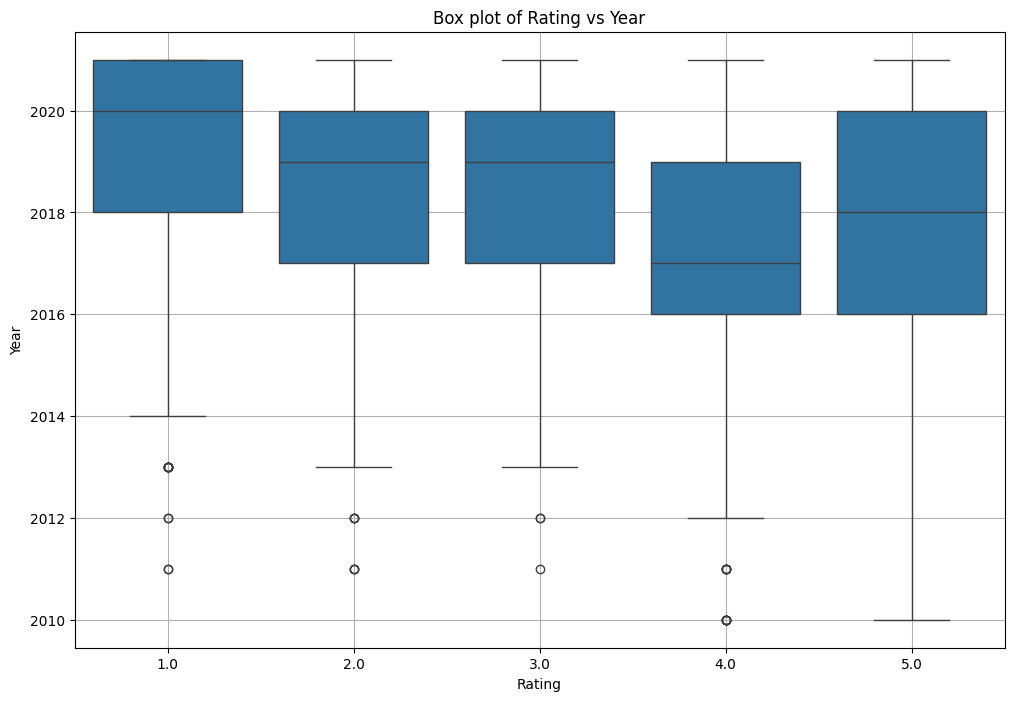

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='year', data=df)
plt.xlabel('Rating')
plt.ylabel('Year')
plt.title('Box plot of Rating vs Year')
plt.grid(True)
plt.show()

As We can see the ratings of all levels are usually concentrated in the most recent years, from around 2016 and 2020. Which may indicate an increase in reviews recently, or even a higher activity by the users. It is possible to see some outliers in earlier years compared to higher ratings.  Suggesting usually the older reviews were reviewed poorly. And there is a consistent median in 2018, and more users rating 1.0 around 2020.

**Calculating Polarity**

In [10]:
df['Polarity_Rating'] = df['rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [11]:
df.head()

,review_date,handle,rating,review,year,Polarity_Rating
0,2018-04-14,The Dolphin,2.0,Delightful coffee maker if you’re only looking...,2018,Negative
1,2019-02-07,Karen Kaffenberger,1.0,UPDATE: Bought this 10-21-18 and I finally ret...,2019,Negative
2,2017-12-23,C1C3C11,4.0,The big reason I ordered this was because I wa...,2017,Positive
3,2016-11-26,Paul Roberts,5.0,I've owned several of their older brewstation ...,2016,Positive
4,2017-11-28,JennyD,3.0,I agonized over which coffee maker to purchase...,2017,Neutral


**Ploting Rating Visualisation Graph**

C:\Users\kcfke\AppData\Local\Temp\ipykernel_17376\984776944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating',data=df, palette='winter')


<Axes: xlabel='rating', ylabel='count'>

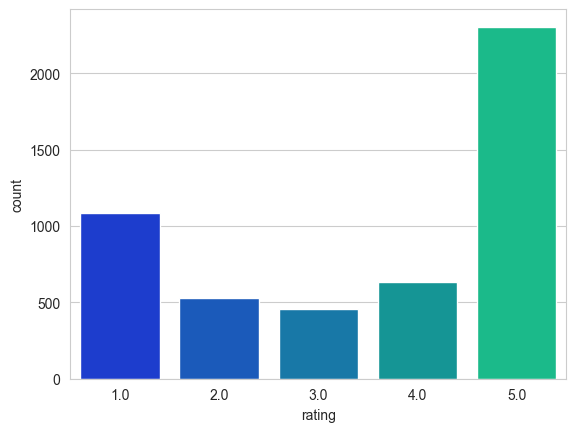

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='rating',data=df, palette='winter')

Twice as many users gave a 1.0 compared to those who gave a 5.0, which, analysing the previous graph, it shows that lately the users are becoming dissatisfied with the choosen Coffee Maker.

**Plotting Polarity Rating Count**

C:\Users\kcfke\AppData\Local\Temp\ipykernel_17376\1376702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Polarity_Rating',data=df, palette='spring')


<Axes: xlabel='Polarity_Rating', ylabel='count'>

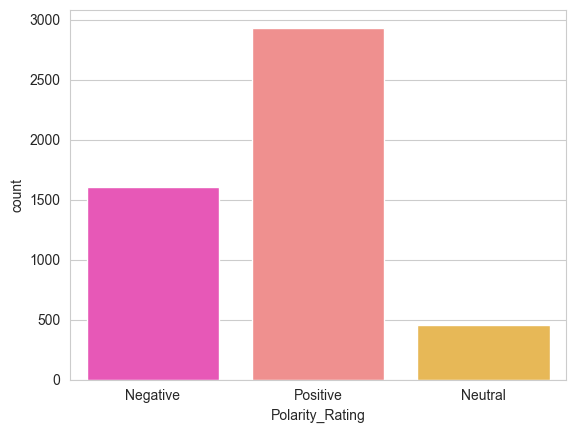

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='spring')

And here we can see that users are generally more inclined to express strong opinions even if negative, once this distribution shows the marjority reviews are positive, followed by the negative reviews, then a smaller proportion of neutral.
If I was selling those Coffee makers, I would go through all negative feedbacks to check which area could be improved.

**Data Preprocessing**

In [16]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:8000]
df_Neutral = df[df['Polarity_Rating'] == 'Neutral']
df_Negative = df[df['Polarity_Rating'] == 'Negative']

**Sample negative and neutral polarity & Creating final dataframe**

In [17]:
df_Neutral_over = df_Neutral.sample(8000, replace=True)
df_Negative_over = df_Negative.sample(8000, replace=True)
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

**Text Preprocessing**

In [19]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

**Applying the method "get_text_processing" into column review**

In [20]:
df['review'] = df['review'].apply(get_text_processing)
df.head()

,review_date,handle,rating,review,year,Polarity_Rating
2,2017-12-23,C1C3C11,4.0,big reason ordered tired dealing coffee carafe...,2017,Positive
3,2016-11-26,Paul Roberts,5.0,Ive owned several older brewstation models las...,2016,Positive
6,2018-04-19,Kris K.,5.0,second Brewstation first one lasted 11 years e...,2018,Positive
10,2016-10-15,Brian Colon,5.0,Let start saying owned previous model Brew Sta...,2016,Positive
12,2018-07-25,L. L.,4.0,Ive purchased every brand 30 years like one be...,2018,Positive


**Visualising Text Review with Polarity Rating**

In [21]:
df = df[['review', 'Polarity_Rating']]
df.head()

,review,Polarity_Rating
2,big reason ordered tired dealing coffee carafe...,Positive
3,Ive owned several older brewstation models las...,Positive
6,second Brewstation first one lasted 11 years e...,Positive
10,Let start saying owned previous model Brew Sta...,Positive
12,Ive purchased every brand 30 years like one be...,Positive


In [22]:
df.shape

(18935, 2)

**Applying One hot encoding on negative, neutral, and positive**

In [23]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df.drop(['Polarity_Rating'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

,review,Negative,Neutral,Positive
2,big reason ordered tired dealing coffee carafe...,False,False,True
3,Ive owned several older brewstation models las...,False,False,True
6,second Brewstation first one lasted 11 years e...,False,False,True
10,Let start saying owned previous model Brew Sta...,False,False,True
12,Ive purchased every brand 30 years like one be...,False,False,True


**Applying Train Test Split**

In [25]:
X = df['review'].values
y = df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

**Applying vectorization**

In [26]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

**Applying frequency, inverse document frequency:**

In [39]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

**Adding different layers**

In [28]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

**Fitting the Model**

In [29]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 216s 4s/step - accuracy: 0.6703 - loss: 0.6658 - val_accuracy: 0.9806 - val_loss: 0.0660
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.9921 - loss: 0.0311 - val_accuracy: 0.9857 - val_loss: 0.0526
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.9979 - loss: 0.0075 - val_accuracy: 0.9864 - val_loss: 0.0522
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9882 - val_loss: 0.0517
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.9988 - loss: 0.0029 - val_accuracy: 0.9842 - val_loss: 0.0731
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.9980 - loss: 0.0039 - val_accuracy: 0.9817 - val_loss: 0.0938
Epoch 6: early stopping


**Evaluating of Model**

In [32]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step - accuracy: 0.9834 - loss: 0.0815
Test accuracy: 0.9816933870315552


**Prediction**

In [33]:
preds = model.predict(X_test)
preds

178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step


array([[4.2056356e-05, 1.7224898e-05, 9.9994063e-01],
       [1.3320416e-06, 9.9998891e-01, 9.7000238e-06],
       [6.8526464e-07, 5.8057628e-07, 9.9999869e-01],
       ...,
       [9.9999940e-01, 2.8143720e-07, 4.1429072e-07],
       [7.3260691e-09, 1.0000000e+00, 1.2956295e-08],
       [2.0273203e-06, 2.3332489e-06, 9.9999559e-01]], dtype=float32)

In [34]:
preds.shape

(5681, 3)

### References

https://towardsdatascience.com/linear-regression-v-s-neural-networks-cd03b29386d4

https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

https://pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/

https://machinelearningmastery.com/neural-network-models-for-combined-classification-and-regression/